# 로지스틱 회귀

## 이진 분류(binary classification)를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀가 있다. 

# 1. 이진 분류(Binary Classification)

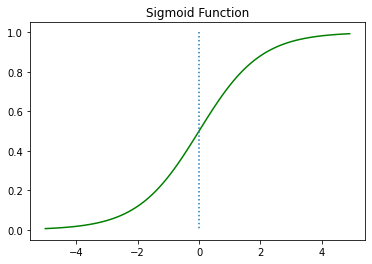

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# 시그모이드 정의
def sigmoid(x):
    return 1/(1+np.exp(-x))
# Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환해준다.


# W가 1이고 b가 0인 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()



### W값의 변화에 따른 경사도 변화

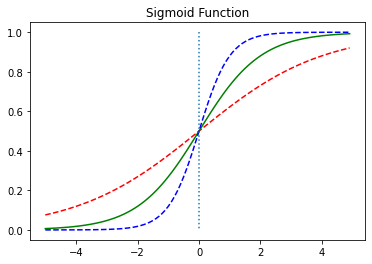

In [3]:

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)


plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
# W의 값이 커지면 경사가 커지고 W의 값이 작아지면 경사가 작아진다.

### b값의 변화에 따른 좌, 우 이동

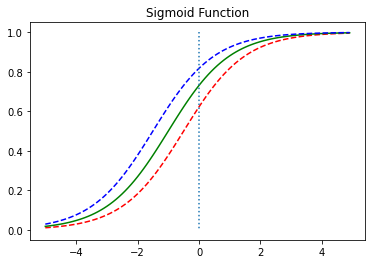

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# b의 값에 따라 그래프가 좌, 우로 이동한다. 

### 비용함수

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
print(hypothesis) # 예측값인 H(x) 출력
print(y_train) # 실제값


torch.Size([6, 2])
torch.Size([6, 1])
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [6]:
# 하나의 원소에 대해서만 오차를 구하는 식
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))


losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

cost = losses.mean()
print(cost)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [7]:
# 파이토치에서는 로지스틱 회귀의 비용 함술르 이미 구현해서 제공하고 있다.
# torch.nn.functional as F -> F.binary_cross_entropy

F.binary_cross_entropy(hypothesis, y_train) # 예측값, 실제값


tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

### 모델 훈련 과정까지 추가한 전체 코드

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.size())
print(y_train.size())

# 모델 초기화
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w,b], lr=1)
n_epoch = 1000

for epoch in range(n_epoch +1):

    # cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(w) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()
    
    # cost로 h(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 ==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, n_epoch, cost.item()
        ))

torch.Size([6, 2])
torch.Size([6, 1])
Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


### 제대로 예측하는지 테스트

In [12]:
hypothesis = torch.sigmoid(x_train.matmul(w) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


### 0과 1사이의 값들이 출력된다. 0.5를 넘으면 true, 넘지 않으면 false로 지정

In [15]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

print(w)
print(b)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
